In [70]:
#INTRODUCTION: This is my first ML project! I am planning on training an XGBoost model to predict the recurrence of 
#thyroid cancer given features (input): 

#Age: Age of the patient (in years).
#Gender: Patient's gender (Male or Female).
#Hx Radiotherapy: History of prior radiotherapy (Yes or No).
#Adenopathy: Presence of lymph node involvement (Yes or No).
#Pathology: Type of thyroid cancer (e.g., Micropapillary).
#Focality: Tumour focality (Uni-Focal or Multi-Focal).
#Risk: Cancer risk classification (Low, Intermediate, High).
#T: Tumour classification (T1, T2, etc.).
#N: Lymph node classification (N0, N1, etc.).
#M: Metastasis classification (M0, M1, etc.).
#Stage: Cancer staging (Stage I, II, III, IV).
#Response: Treatment response (Excellent, Indeterminate, etc.).
#Recurred: Whether cancer recurred (Yes or No).

#data has 383 samples and 13 columns. 
#data source: https://www.kaggle.com/datasets/aneevinay/thyroid-cancer-recurrence-dataset

#packages requirement: numpy, pandas, matplotlib, scikit-learn, xgboost

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

In [71]:
#importing dataset using pandas

data = pd.read_csv("filtered_thyroid_data.csv")

In [72]:
data.head()
data.shape

#383 rows and 13 columns

(383, 13)

In [73]:
data.count(), data.nunique()

#no null values
#categorical features: Gender, Hx Radiotherapy, Adenopathy, Pathology, Focality, RIsk, T, N, M, Stage, Response. 

(Age                383
 Gender             383
 Hx Radiothreapy    383
 Adenopathy         383
 Pathology          383
 Focality           383
 Risk               383
 T                  383
 N                  383
 M                  383
 Stage              383
 Response           383
 Recurred           383
 dtype: int64,
 Age                65
 Gender              2
 Hx Radiothreapy     2
 Adenopathy          6
 Pathology           4
 Focality            2
 Risk                3
 T                   7
 N                   3
 M                   2
 Stage               5
 Response            4
 Recurred            2
 dtype: int64)

In [74]:
#correcting a typo in column name

data = data.rename(columns={'Hx Radiothreapy': 'Hx Radiotherapy'})

#convert the binary categorical features to 0 and 1

data["Gender"].unique() #checking there are just two unique values
data["Gender"] = data["Gender"].replace({"F": 0, "M": 1})   #Female = 0, Male = 1
data["Hx Radiotherapy"].unique()
data["Hx Radiotherapy"] = data["Hx Radiotherapy"].replace({"Yes": 0, "No": 1}) #yes = 0, no = 1
data["Focality"].unique()
data["Focality"] = data["Focality"].replace({"Uni-Focal": 0, "Multi-Focal": 1}) #unifocal = 0, multifocal = 1
data["M"].unique()
data["M"] = data["M"].replace({"M0": 0, "M1": 1}) #M0 = 0, M1 = 1
data["Recurred"].unique()
data["Recurred"] = data["Recurred"].replace({"No": 0, "Yes": 1}) #M0 = 0, M1 = 1

In [75]:
#defining an array of all the multi-class (non-binary) categorical features to one-hot encode them using pandas.get_dummies

cat_var = ["Adenopathy", "Pathology", "Risk", "T", "N", "Stage", "Response"]

#one hot encoding "Adenopathy", "Pathology", "Risk", "T", "N", "Stage", "Response" using get_dummies()

data = pd.get_dummies(data = data, prefix = cat_var, columns = cat_var)

In [76]:
#checking if all categorical variables are binary
#rechening the shape of the dataframe after modifications

data.nunique()
data.shape

(383, 38)

In [77]:
# In this dataset, we want the last column (Recurred) to be the target, and the rest are features used to predict the recurrence of cancer
# dividing the data into features and target
#defining feats to hold the feature variables

feats = [x for x in data.columns if x != "Recurred"]
feats
len(feats)

37

In [78]:
#since this is a classification problem, it is prudent to stratify targets so that the train, dev, and test sets end up with 
#comparable proportions of 0's and 1's. We don't want a highly skewed test set or one that has only 1's or 0's

X_train, x_, y_train, y_ = train_test_split(data[feats], data["Recurred"], test_size = 0.4, stratify = data["Recurred"])
X_dev, X_test, y_dev, y_test = train_test_split(x_, y_, test_size = 0.5, stratify = y_)

In [79]:
print(f"shape of training dataset X_test : {X_train.shape},\nshape of test dataset X_test : {X_test.shape},\nshape of the dev dataset X_dev: {X_dev.shape}")

shape of training dataset X_test : (229, 37),
shape of test dataset X_test : (77, 37),
shape of the dev dataset X_dev: (77, 37)


In [80]:
#initiate and define model

model_TC = XGBClassifier(eval_metric='logloss')

#define the grid dictionary with values for each hyperparameter that I would like to try out

grid = {
    "min_child_weight" : [1, 3, 5, 10, 15],
    "max_depth" : [2, 4, 6, 8, 10, 12, 16, None],
    "learning_rate" : [0.01, 0.05, 0.1, 0.2],
    "n_estimators" : [50, 100, 150, 200]
}
#doing a grid search across all chosen values of hyperparameters to come up with the best fitting hyperparameter values

grid_search = GridSearchCV(estimator = model_TC, param_grid = grid, cv = 5, scoring = "accuracy", verbose = 1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 640 candidates, totalling 3200 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.01, 0.05, 0.1, 0.2],
                         'max_depth': [2, 4, 6, 8, 10, 12, 16, None],
                         'min_child_weight': [1, 3, 5, 10, 15],
                         'n_estimators': [50, 100, 150, 200]},
             scoring='accuracy', verbose=1)

In [81]:
#taking a look at the best model and the best hyperparameter values

best_model = grid_search.best_estimator_
print(grid_search.best_params_)
accuracy_score(best_model.predict(X_train), y_train), accuracy_score(best_model.predict(X_test), y_test)

{'learning_rate': 0.2, 'max_depth': 2, 'min_child_weight': 3, 'n_estimators': 150}


(0.9781659388646288, 0.961038961038961)

In [86]:
#the test and train accuracy are pretty high 
#Even though I did a grid search, I want to enter a for-loop and check how my accuracy varies for different max_depth values for manually trained 
#models and visualize any idication of high bias (underfitting) through plotting

train_accuracy = []   #to store accuracy on training data for all models
dev_accuracy =   []     #to store accuracy on dev data for all models
models = []
max_depth = [2, 4, 6, 8, 10, 12, 16, 20, None]

for i in max_depth:
    print(f"checking the accuracy of model with max_depth = {i}....\n")
    model = XGBClassifier(max_depth = i, min_child_weight = 3, n_estimators = 150, learning_rate = 0.2, early_stopping_rounds = 50, verbosity = 1)
    model.fit(X_train, y_train, eval_set = [(X_dev, y_dev)])
    models.append(model)
    yhat = model.predict(X_train)
    print(f"train_accuracy for model with max_depth = {i} = {accuracy_score(yhat, y_train)}\n")
    train_accuracy.append(accuracy_score(yhat, y_train))
    yhat_dev = model.predict(X_dev)
    print(f"dev_accuracy for model with max_depth = {i} = {accuracy_score(yhat_dev, y_dev)}\n")
    dev_accuracy.append(accuracy_score(yhat_dev, y_dev))


checking the accuracy of model with max_depth = 2....

[0]	validation_0-logloss:0.46358
[1]	validation_0-logloss:0.38911
[2]	validation_0-logloss:0.33820
[3]	validation_0-logloss:0.29611
[4]	validation_0-logloss:0.26897
[5]	validation_0-logloss:0.23769
[6]	validation_0-logloss:0.21395
[7]	validation_0-logloss:0.20350
[8]	validation_0-logloss:0.19391
[9]	validation_0-logloss:0.17944
[10]	validation_0-logloss:0.17361
[11]	validation_0-logloss:0.16320
[12]	validation_0-logloss:0.15879
[13]	validation_0-logloss:0.15688
[14]	validation_0-logloss:0.14911
[15]	validation_0-logloss:0.14701
[16]	validation_0-logloss:0.14569
[17]	validation_0-logloss:0.14010
[18]	validation_0-logloss:0.13955
[19]	validation_0-logloss:0.13530
[20]	validation_0-logloss:0.13486
[21]	validation_0-logloss:0.13481
[22]	validation_0-logloss:0.13263
[23]	validation_0-logloss:0.13274
[24]	validation_0-logloss:0.13076
[25]	validation_0-logloss:0.13077
[26]	validation_0-logloss:0.12969
[27]	validation_0-logloss:0.12806
[28

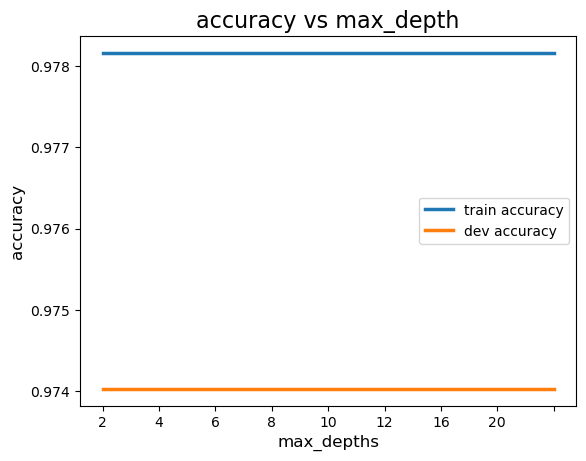

In [87]:
#plotting the train and dev accuracies for better visualisation
#Accuracy values are a bit lower than with gridsearch because gridsearch calculated accuracy on only cv-1 folds each time, 
#not the entire train set. 

plt.plot(train_accuracy, linewidth = 2.5)
plt.plot(dev_accuracy, linewidth = 2.5)
plt.xticks(ticks = range(len(max_depth)), labels = max_depth)
plt.xlabel("max_depths", size = 12)
plt.ylabel("accuracy", size = 12)
plt.title("accuracy vs max_depth", size = 16)
plt.legend(["train accuracy", "dev accuracy"])

#seems like the train and dev accuracy are close enough throughout
#there does not appear to be high bias or high variance here

In [88]:
#let's see how the train and dev accuracies vary with min_child_weight

train_accuracy = []
dev_accuracy = []
models = []
min_child_weight = [1, 3, 5, 10, 15]

for i in min_child_weight:
    print(f"checking the accuracy of model with min_child_weight = {i}....\n")
    model = XGBClassifier(max_depth = 2, min_child_weight = i, n_estimators = 150, learning_rate = 0.2, early_stopping_rounds = 50, verbosity = 1)
    model.fit(X_train, y_train, eval_set = [(X_dev, y_dev)])
    models.append(model)
    yhat = model.predict(X_train)
    print(f"train_accuracy for model with min_child_weight = {i} = {accuracy_score(yhat, y_train)}\n")
    train_accuracy.append(accuracy_score(yhat, y_train))
    yhat_dev = model.predict(X_dev)
    print(f"dev_accuracy for model with min_child_weight = {i} = {accuracy_score(yhat_dev, y_dev)}\n")
    dev_accuracy.append(accuracy_score(yhat_dev, y_dev))

checking the accuracy of model with min_child_weight = 1....

[0]	validation_0-logloss:0.46358
[1]	validation_0-logloss:0.38073
[2]	validation_0-logloss:0.32908
[3]	validation_0-logloss:0.29123
[4]	validation_0-logloss:0.25845
[5]	validation_0-logloss:0.23153
[6]	validation_0-logloss:0.21204
[7]	validation_0-logloss:0.19781
[8]	validation_0-logloss:0.18512
[9]	validation_0-logloss:0.17738
[10]	validation_0-logloss:0.16664
[11]	validation_0-logloss:0.15996
[12]	validation_0-logloss:0.15479
[13]	validation_0-logloss:0.15092
[14]	validation_0-logloss:0.14801
[15]	validation_0-logloss:0.14538
[16]	validation_0-logloss:0.14111
[17]	validation_0-logloss:0.13890
[18]	validation_0-logloss:0.13718
[19]	validation_0-logloss:0.13556
[20]	validation_0-logloss:0.13417
[21]	validation_0-logloss:0.13393
[22]	validation_0-logloss:0.13417
[23]	validation_0-logloss:0.13334
[24]	validation_0-logloss:0.13162
[25]	validation_0-logloss:0.13112
[26]	validation_0-logloss:0.13214
[27]	validation_0-logloss:0.13

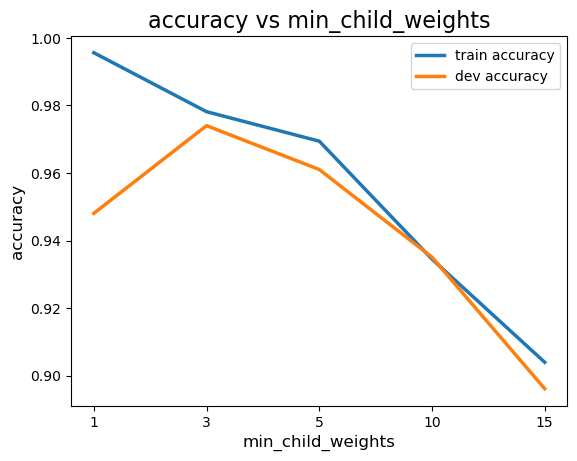

In [89]:
#visualizing the accuracies vs min_child_weights

plt.plot(train_accuracy, linewidth = 2.5)
plt.plot(dev_accuracy, linewidth = 2.5)
plt.xticks(ticks = range(len(min_child_weight)), labels = min_child_weight)
plt.xlabel("min_child_weights", size = 12)
plt.ylabel("accuracy", size = 12)
plt.title("accuracy vs min_child_weights", size = 16)
plt.legend(["train accuracy", "dev accuracy"])

#min_child_weight = 1 is a good hyperparameter as predicted by gridsearchcv. train and dev accuracies are close throughout but 
#both accuracies fall off, especially train accuracy after 3. Perhaps suggesting underfit for higher values of min_child_weight?

In [90]:
#check how accuracies vary with learning_rate

train_accuracy = []
dev_accuracy = []
models = []
learning_rate = [0.01, 0.05, 0.1, 0.2]

for i in learning_rate:
    print(f"checking the accuracy of model with learning_rate = {i}....\n")
    model = XGBClassifier(max_depth = 2, min_child_weight = 3, n_estimators = 150, learning_rate = i, early_stopping_rounds = 50, verbosity = 1)
    model.fit(X_train, y_train, eval_set = [(X_dev, y_dev)])
    models.append(model)
    yhat = model.predict(X_train)
    print(f"train_accuracy for model with learning_rate = {i} = {accuracy_score(yhat, y_train)}\n")
    train_accuracy.append(accuracy_score(yhat, y_train))
    yhat_dev = model.predict(X_dev)
    print(f"dev_accuracy for model with learning_rate = {i} = {accuracy_score(yhat_dev, y_dev)}\n")
    dev_accuracy.append(accuracy_score(yhat_dev, y_dev))


checking the accuracy of model with learning_rate = 0.01....

[0]	validation_0-logloss:0.58046
[1]	validation_0-logloss:0.57378
[2]	validation_0-logloss:0.56726
[3]	validation_0-logloss:0.56090
[4]	validation_0-logloss:0.55469
[5]	validation_0-logloss:0.54863
[6]	validation_0-logloss:0.54271
[7]	validation_0-logloss:0.53693
[8]	validation_0-logloss:0.53127
[9]	validation_0-logloss:0.52574
[10]	validation_0-logloss:0.52034
[11]	validation_0-logloss:0.51505
[12]	validation_0-logloss:0.50987
[13]	validation_0-logloss:0.50480
[14]	validation_0-logloss:0.49984
[15]	validation_0-logloss:0.49457
[16]	validation_0-logloss:0.48981
[17]	validation_0-logloss:0.48474
[18]	validation_0-logloss:0.48016
[19]	validation_0-logloss:0.47568
[20]	validation_0-logloss:0.47087
[21]	validation_0-logloss:0.46656
[22]	validation_0-logloss:0.46193
[23]	validation_0-logloss:0.45778
[24]	validation_0-logloss:0.45370
[25]	validation_0-logloss:0.44971
[26]	validation_0-logloss:0.44578
[27]	validation_0-logloss:0.44

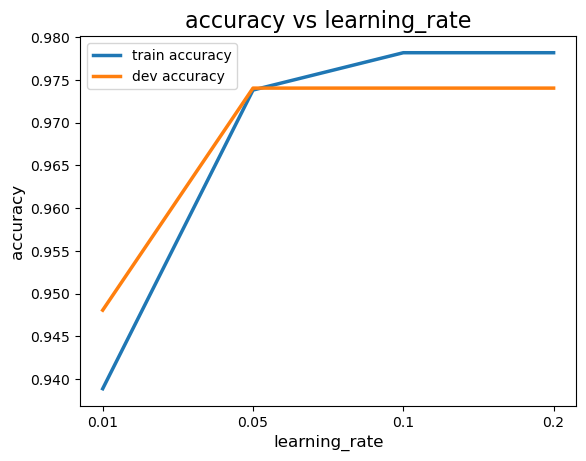

In [91]:
#visualizing accuracies vs learning_rate

plt.plot(train_accuracy, linewidth = 2.5)
plt.plot(dev_accuracy, linewidth = 2.5)
plt.xticks(ticks = range(len(learning_rate)), labels = learning_rate)
plt.xlabel("learning_rate", size = 12)
plt.ylabel("accuracy", size = 12)
plt.title("accuracy vs learning_rate", size = 16)
plt.legend(["train accuracy", "dev accuracy"])

#learning rate of 0.1 - 0.2 seems to be a good value
#both train and dev accuracies are close enough for all values, but accuracy increases for values 0.1 and 0.2

In [92]:
#manually training the XGBoost model with hyperparameters min_child_weight = 3, max_depth  = 2, n_estimators = 150, and learning_rate = 0.2

model_final = XGBClassifier(max_depth = 2, min_child_weight = 3, n_estimators = 150, learning_rate = 0.2, early_stopping_rounds = 50, verbosity = 1)
model_final.fit(X_train, y_train, eval_set = [(X_dev, y_dev)])

[0]	validation_0-logloss:0.46358
[1]	validation_0-logloss:0.38911
[2]	validation_0-logloss:0.33820
[3]	validation_0-logloss:0.29611
[4]	validation_0-logloss:0.26897
[5]	validation_0-logloss:0.23769
[6]	validation_0-logloss:0.21395
[7]	validation_0-logloss:0.20350
[8]	validation_0-logloss:0.19391
[9]	validation_0-logloss:0.17944
[10]	validation_0-logloss:0.17361
[11]	validation_0-logloss:0.16320
[12]	validation_0-logloss:0.15879
[13]	validation_0-logloss:0.15688
[14]	validation_0-logloss:0.14911
[15]	validation_0-logloss:0.14701
[16]	validation_0-logloss:0.14569
[17]	validation_0-logloss:0.14010
[18]	validation_0-logloss:0.13955
[19]	validation_0-logloss:0.13530
[20]	validation_0-logloss:0.13486
[21]	validation_0-logloss:0.13481
[22]	validation_0-logloss:0.13263
[23]	validation_0-logloss:0.13274
[24]	validation_0-logloss:0.13076
[25]	validation_0-logloss:0.13077
[26]	validation_0-logloss:0.12969
[27]	validation_0-logloss:0.12806
[28]	validation_0-logloss:0.12713
[29]	validation_0-loglos

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=50,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=150, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [93]:
#reporting the accuracy values for the final model

print(f"accuracy score of model on training data = {accuracy_score(model_final.predict(X_train), y_train)}\n")
print(f"accuracy score of model on dev data = {accuracy_score(model_final.predict(X_dev), y_dev)}\n")
print(f"accuracy score of model on test data = {accuracy_score(model_final.predict(X_test), y_test)}\n")


accuracy score of model on training data = 0.9781659388646288

accuracy score of model on dev data = 0.974025974025974

accuracy score of model on test data = 0.961038961038961



In [94]:
print(classification_report(model_final.predict(X_test), y_test))

#precision: among the predictions that were classified as (0/1), how many were actually (0/1)?
#recall: among those examples that are actually (0/1), how many were predicted correctly as (0/1)?
#f1-score: strikes a balance between precision and recall. It is the harmonic mean of precision and recall

#model has an avg accuracy avg precision and avg recall of 96%, pretty good!

              precision    recall  f1-score   support

           0       0.98      0.96      0.97        56
           1       0.91      0.95      0.93        21

    accuracy                           0.96        77
   macro avg       0.95      0.96      0.95        77
weighted avg       0.96      0.96      0.96        77



In [95]:
import joblib
joblib.dump(model_final, 'thyroid_recurrence_xgb_model.pkl')


['thyroid_recurrence_xgb_model.pkl']